# Exploratory Data Analysis

 We will perform all future analysis and querying of the data in .ipynb files. .ipynb files are a great medium to tell the story of the EDA process and later analysis of the data. We will creating the classes in .py files and import them into this .ipynb for use.

In [1]:
import sys
sys.path.insert(0, ".")

from pathlib import Path
import db_utils
import pandas as pd

db_utils

df = pd.read_csv('loan_payments.csv')
df.head()

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1                     0.0           Jan-2022              407.52   
2                     0.0           Oct-2021            12850.16   
3                     0.0           Jun-2021            13899.67   
4                     0.0           Jan-2022              456.54   

  next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                        0.0   
1          Feb-2022              Jan-2022                        0.0   
2               NaN              Oct-2021                        0.0   
3               NaN              Jun-2021                        0.0   
4          Feb-2022              Jan-2022                        0.0   

  mths_since_last_major_derog  policy_code  application_type  
0                         5.0            1        INDIVIDUAL  
1                         NaN            1        INDIVIDUAL  
2                         NaN            1        INDIVIDUAL  
3                         NaN            1        INDIVIDUAL  
4                         NaN            1        INDIVIDUAL  

[5 rows x 43 columns]

In [2]:
print('The first row of the data is:')
df.iloc[0]

The first row of the data is:


id                                 38676116
member_id                          41461848
loan_amount                            8000
funded_amount                        8000.0
funded_amount_inv                    8000.0
term                              36 months
int_rate                               7.49
instalment                           248.82
grade                                     A
sub_grade                                A4
employment_length                   5 years
home_ownership                     MORTGAGE
annual_inc                          46000.0
verification_status            Not Verified
issue_date                         Jan-2021
loan_status                         Current
payment_plan                              n
purpose                         credit_card
dti                                   19.54
delinq_2yrs                               2
earliest_credit_line               Oct-1987
inq_last_6mths                            1
mths_since_last_delinq          

# Converting columns to the correct format

After familiarising ourselves with the data, we should alter any columns that aren't in the correct format. 

Because there are columns which should be converted into a different format, we create a DataTransform class to handle these conversions. 

We have added methods to the DataTransform class which we can apply to the DataFrame columns to perform any required conversions. 

We can list the unique elements in each column of the data for easier inspection, alongside the column's current datatype:

In [3]:
for column_name in df.columns:
    print(column_name, 'has these unique elements: ')
    print(set(df[column_name]))
    print (column_name, 'has current df type of', df[column_name].dtype, '\n')

id has these unique elements: 
{38141958, 9175049, 3932170, 38141963, 6815755, 393228, 7077904, 38535185, 6815762, 655377, 7077908, 6815770, 524316, 9175070, 655392, 8126497, 7077925, 38141991, 7077933, 1048621, 6291506, 5505075, 7340088, 7077945, 38535227, 8126532, 7077956, 1048647, 38535241, 38535242, 9175114, 6815821, 38535247, 8126543, 9175121, 6815827, 7077972, 38142037, 1048666, 8126558, 393310, 786529, 6815842, 393313, 6815847, 786538, 786542, 6815857, 1048690, 6815864, 786552, 524408, 9175163, 8126587, 7078014, 7078015, 38142081, 786563, 6815879, 8126600, 786569, 786567, 38535309, 7078031, 393361, 8126610, 7078037, 131223, 9175192, 38142105, 38142106, 524446, 524447, 9175207, 393387, 524462, 38535347, 786611, 38142133, 8126646, 524472, 393403, 524478, 38535359, 38535360, 524479, 786626, 786627, 38142148, 38535365, 786633, 8126666, 38535371, 38142155, 7078093, 6291662, 8126677, 9175258, 7340250, 7078109, 1048797, 9175263, 1048800, 786655, 6815970, 393440, 7078116, 1048806, 38535

In [4]:
print(df.dtypes)

id                               int64
member_id                        int64
loan_amount                      int64
funded_amount                  float64
funded_amount_inv              float64
term                            object
int_rate                       float64
instalment                     float64
grade                           object
sub_grade                       object
employment_length               object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_date                      object
loan_status                     object
payment_plan                    object
purpose                         object
dti                            float64
delinq_2yrs                      int64
earliest_credit_line            object
inq_last_6mths                   int64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_accounts                    int64
total_accounts           

##  Are there columns that could be represented better numerically?

Some columns are in float64 format, but because all of their elements are integers, we can and should convert their datatype to int64 to save space:
annual_inc
mths_since_last_record
collections_12_mths_ex_med
mths_since_last_major_derog

In [5]:
for column_name in ('annual_inc','mths_since_last_record','collections_12_mths_ex_med','mths_since_last_major_derog'):
    print(column_name, ': ',df[column_name].dtype)

annual_inc :  float64
mths_since_last_record :  float64
collections_12_mths_ex_med :  float64
mths_since_last_major_derog :  float64


In [6]:
from DataTransform import DataTransform
df_transforming_instance = DataTransform()

for column_name in ('annual_inc','mths_since_last_record','collections_12_mths_ex_med','mths_since_last_major_derog'):
            df = df_transforming_instance.convert_to_int(df, column_name)

In [7]:
for column_name in ('annual_inc','mths_since_last_record','collections_12_mths_ex_med','mths_since_last_major_derog'):
    print(column_name, ': ',df[column_name].dtype)

annual_inc :  int64
mths_since_last_record :  float64
collections_12_mths_ex_med :  float64
mths_since_last_major_derog :  float64


Only annual_inc can currently be ocnverted into int64. Because some of the columns have NaN values, they cannto yet be covnerted into int64.

In [8]:
# count how many NaN valeus there are:
for column_name in ('annual_inc','mths_since_last_record','collections_12_mths_ex_med','mths_since_last_major_derog'):
    print(column_name, 'has ',df[column_name].isna().sum(), 'NaN values.')

annual_inc has  0 NaN values.
mths_since_last_record has  48050 NaN values.
collections_12_mths_ex_med has  51 NaN values.
mths_since_last_major_derog has  46732 NaN values.


## Are dates in the correct format?


In [9]:
date_mask = df.columns.str.contains('date')

print(df.loc[:,date_mask])

print(df.loc[:,date_mask].dtypes) # selects mask and prints dtypes

      issue_date last_payment_date next_payment_date last_credit_pull_date
0       Jan-2021          Jan-2022          Feb-2022              Jan-2022
1       Jan-2021          Jan-2022          Feb-2022              Jan-2022
2       Jan-2021          Oct-2021               NaN              Oct-2021
3       Jan-2021          Jun-2021               NaN              Jun-2021
4       Jan-2021          Jan-2022          Feb-2022              Jan-2022
...          ...               ...               ...                   ...
54226   Jul-2013          Jul-2016               NaN              Jul-2016
54227   Oct-2013          Oct-2016               NaN              Sep-2016
54228   Aug-2013          Sep-2016          Sep-2016              May-2013
54229   Aug-2013          Mar-2014               NaN              May-2013
54230   Jul-2013          Mar-2014          Dec-2014              Jan-2015

[54231 rows x 4 columns]
issue_date               object
last_payment_date        object
next_payme

No! So we should convert these objects (strings) into dates. 

In [10]:

for column_name in ('issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'):
            df = df_transforming_instance.date_convert(df, column_name)

And now we can see these columns are in date format:

In [11]:
print(df.loc[:,date_mask])

print(df.loc[:,date_mask].dtypes) # selects mask and prints dtypes

      issue_date last_payment_date next_payment_date last_credit_pull_date
0     2021-01-01        2022-01-01        2022-02-01            2022-01-01
1     2021-01-01        2022-01-01        2022-02-01            2022-01-01
2     2021-01-01        2021-10-01               NaT            2021-10-01
3     2021-01-01        2021-06-01               NaT            2021-06-01
4     2021-01-01        2022-01-01        2022-02-01            2022-01-01
...          ...               ...               ...                   ...
54226 2013-07-01        2016-07-01               NaT            2016-07-01
54227 2013-10-01        2016-10-01               NaT            2016-09-01
54228 2013-08-01        2016-09-01        2016-09-01            2013-05-01
54229 2013-08-01        2014-03-01               NaT            2013-05-01
54230 2013-07-01        2014-03-01        2014-12-01            2015-01-01

[54231 rows x 4 columns]
issue_date               datetime64[ns]
last_payment_date        datetime6

## Should some columns be categorical? 


Yes, some columns in the data should be categorical, when they have a small quantity of possible options:

In [12]:
for column_name in ('term','grade','sub_grade','employment_length','home_ownership','verification_status','loan_status','purpose'):
    print('The',column_name,'column only has', len(set(df[column_name])),'unique options:')
    print(set(df[column_name]))
    print(column_name,'has datatype:',df[column_name].dtype,'\n')

The term column only has 3 unique options:
{'60 months', '36 months', nan}
term has datatype: object 

The grade column only has 7 unique options:
{'G', 'E', 'A', 'C', 'D', 'F', 'B'}
grade has datatype: object 

The sub_grade column only has 35 unique options:
{'C3', 'G4', 'C1', 'E3', 'F5', 'D2', 'F3', 'B1', 'C4', 'D3', 'E1', 'B3', 'C2', 'B5', 'A4', 'G5', 'A3', 'E2', 'G1', 'F2', 'B4', 'D5', 'G2', 'E5', 'D1', 'F4', 'A1', 'D4', 'F1', 'A2', 'A5', 'B2', 'C5', 'G3', 'E4'}
sub_grade has datatype: object 

The employment_length column only has 12 unique options:
{'< 1 year', '10+ years', '8 years', '1 year', '6 years', '5 years', '2 years', nan, '4 years', '3 years', '7 years', '9 years'}
employment_length has datatype: object 

The home_ownership column only has 5 unique options:
{'NONE', 'MORTGAGE', 'OTHER', 'RENT', 'OWN'}
home_ownership has datatype: object 

The verification_status column only has 3 unique options:
{'Verified', 'Source Verified', 'Not Verified'}
verification_status has da

We can convert them into the category datatype:

In [13]:
for column_name in ('term','grade','sub_grade','employment_length','home_ownership','verification_status','loan_status','purpose'):
            df = df_transforming_instance.convert_to_category(df, column_name)

In [14]:
for column_name in ('term','grade','sub_grade','employment_length','home_ownership','verification_status','loan_status','purpose'):
    # print('The',column_name,'column only has', len(set(df[column_name])),'unique options:')
    # print(set(df[column_name]))
    print(column_name,'has datatype:',df[column_name].dtype,'\n')

term has datatype: category 

grade has datatype: category 

sub_grade has datatype: category 

employment_length has datatype: category 

home_ownership has datatype: category 

verification_status has datatype: category 

loan_status has datatype: category 

purpose has datatype: category 



## Are there any excess symbols in the data?

The payment_plan column only contain two options:

In [15]:
column_name = 'payment_plan'
print('The',column_name,'column only has', len(set(df[column_name])),'unique options:')
print(set(df[column_name]))
print(column_name,'has datatype:',df[column_name].dtype,'\n')

The payment_plan column only has 2 unique options:
{'n', 'y'}
payment_plan has datatype: object 



This column can be turned into a boolean column to remove excess symbols from the data:

In [16]:
column_name = 'payment_plan'
df = df_transforming_instance.convert_to_boolean(df, column_name)

In [17]:
column_name = 'payment_plan'
print('The',column_name,'column only has', len(set(df[column_name])),'unique options:')
print(set(df[column_name]))
print(column_name,'has datatype:',df[column_name].dtype,'\n')

The payment_plan column only has 2 unique options:
{False, True}
payment_plan has datatype: boolean 



## Determine the amount of NULLs in each column



Let's visualise the null values in the data:

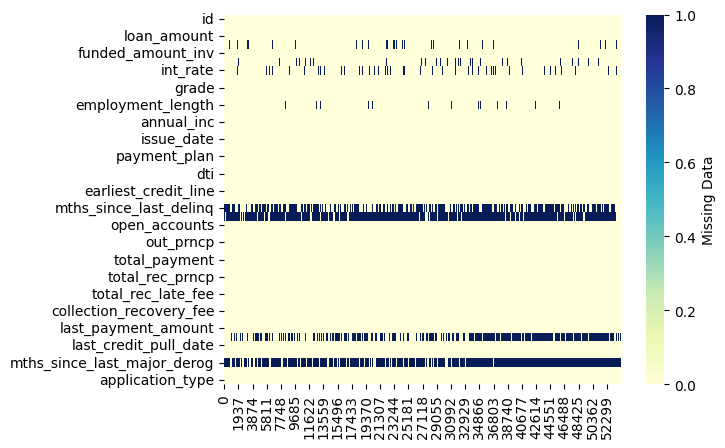

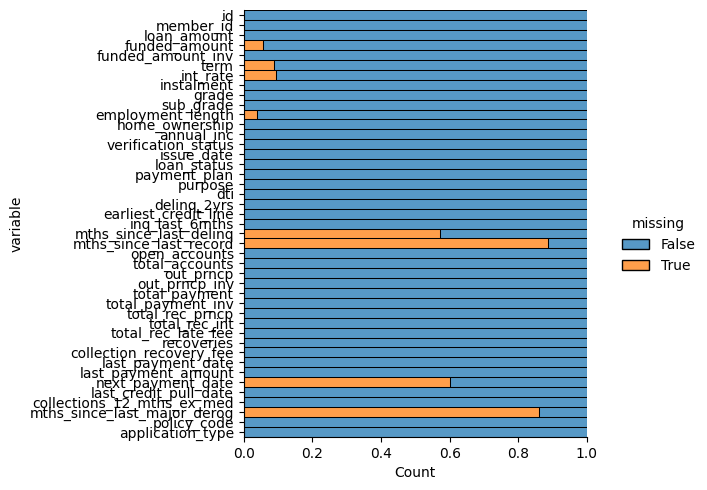

In [18]:
from Plotter import Plotter
plotter_instance = Plotter()
plotter_instance.visualise_null_values(df)


These columns should be dropped because they each contain mostly NULL values:

In [19]:
from DataFrameInfo import DataFrameInfo
DataFrameInfo_instance = DataFrameInfo()
print(DataFrameInfo_instance.find_extreme_amounts_of_null_values(df))

mths_since_last_delinq has 31002 null values out of 54231 values, which is 57.17 percent of the column.
This column should be removed, because most of it is null values.
mths_since_last_record has 48050 null values out of 54231 values, which is 88.6 percent of the column.
This column should be removed, because most of it is null values.
next_payment_date has 32608 null values out of 54231 values, which is 60.13 percent of the column.
This column should be removed, because most of it is null values.
mths_since_last_major_derog has 46732 null values out of 54231 values, which is 86.17 percent of the column.
This column should be removed, because most of it is null values.
The rest of the columns have less than 50% null values.
None


So we drop those columns:

In [20]:
print('The length of each row is:')
len(df.iloc[0])

The length of each row is:


43

In [21]:
for column_name in ('mths_since_last_delinq','mths_since_last_record','next_payment_date','mths_since_last_major_derog'):
    df = df.drop(column_name,axis=1)



And check that the columns have been dropped:

In [22]:
# print('The first row of the data is:')
# df.iloc[0]
print('The length of each row is:')
len(df.iloc[0])

The length of each row is:


39

In [23]:
print(df.dtypes)

id                                     int64
member_id                              int64
loan_amount                            int64
funded_amount                        float64
funded_amount_inv                    float64
term                                category
int_rate                             float64
instalment                           float64
grade                               category
sub_grade                           category
employment_length                   category
home_ownership                      category
annual_inc                             int64
verification_status                 category
issue_date                    datetime64[ns]
loan_status                         category
payment_plan                         boolean
purpose                             category
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line                  object
inq_last_6mths                         int64
open_accou

## Imputing NULL values

We have columns that cotnain null values, but are not motly null values, we should aim to fill in the gaps by imputign the null values with estiamtes ('imputing')

In [24]:
print(DataFrameInfo_instance.calculate_percentages_of_null_values(df))

id has 0 null values out of 54231 values, which is 0.0 percent of the column.
member_id has 0 null values out of 54231 values, which is 0.0 percent of the column.
loan_amount has 0 null values out of 54231 values, which is 0.0 percent of the column.
funded_amount has 3007 null values out of 54231 values, which is 5.54 percent of the column.
funded_amount_inv has 0 null values out of 54231 values, which is 0.0 percent of the column.
term has 4772 null values out of 54231 values, which is 8.8 percent of the column.
int_rate has 5169 null values out of 54231 values, which is 9.53 percent of the column.
instalment has 0 null values out of 54231 values, which is 0.0 percent of the column.
grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
sub_grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
employment_length has 2118 null values out of 54231 values, which is 3.91 percent of the column.
home_ownership has 0 null values out of 5423

term and employment_length are categroical columns with null values.
the otehr categroical columns do not have null values.
We could drop these columns, but because they have less than 10% null values, we can reasonably impute both column's null values with the mode of their respective categories: 

In [25]:
from DataFrameTransform import DataFrameTransform
dataframe_transforming_instance = DataFrameTransform()

df = dataframe_transforming_instance.impute(df,'term','mode')
df = dataframe_transforming_instance.impute(df,'employment_length','mode')

Within the DataFrameTransform class we create a method which can impute the DataFrame's columns. 
 
For the non-categorical columns, we decide whether the column should be imputed with the median or the mean:

In [26]:
# from matplotlib import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# plt.rc("axes.spines", top=False, right=False)
# sns.set_style(style='darkgrid', rc=None)

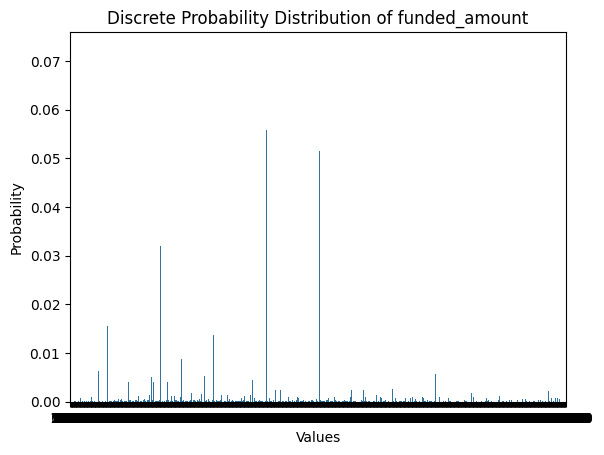

The mode of the distribution is 10000.0
The mean of the distribution is 13229.50911682024
The median of the distribution is 12000.0


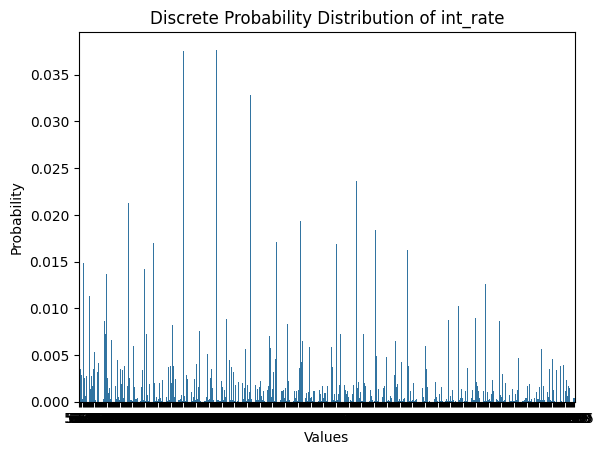

The mode of the distribution is 11.99
The mean of the distribution is 13.507328482328484
The median of the distribution is 13.16


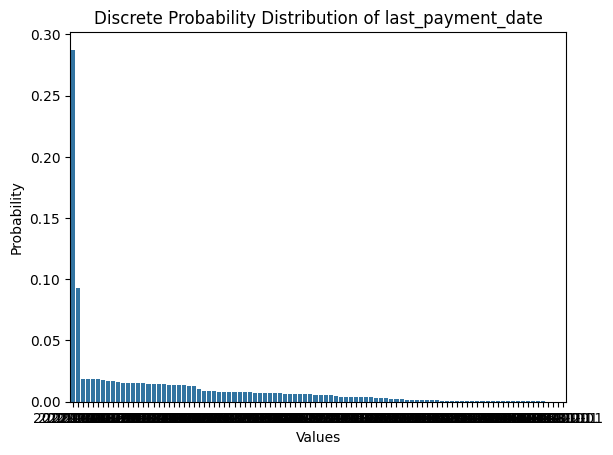

The mode of the distribution is 2022-01-01 00:00:00
The mean of the distribution is 2020-08-23 00:21:38.600391680
The median of the distribution is 2021-04-01 00:00:00


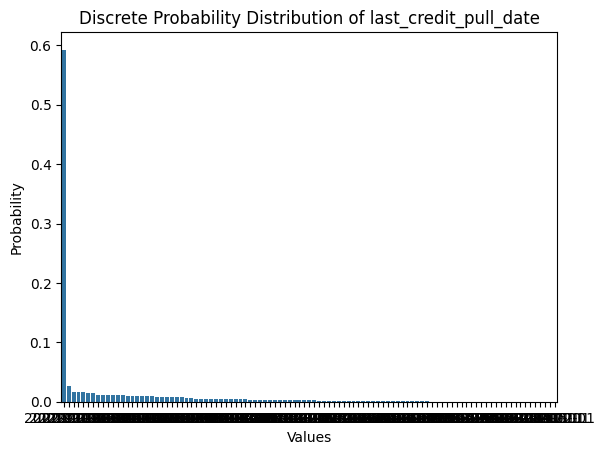

The mode of the distribution is 2022-01-01 00:00:00
The mean of the distribution is 2021-04-15 16:16:28.964296192
The median of the distribution is 2022-01-01 00:00:00


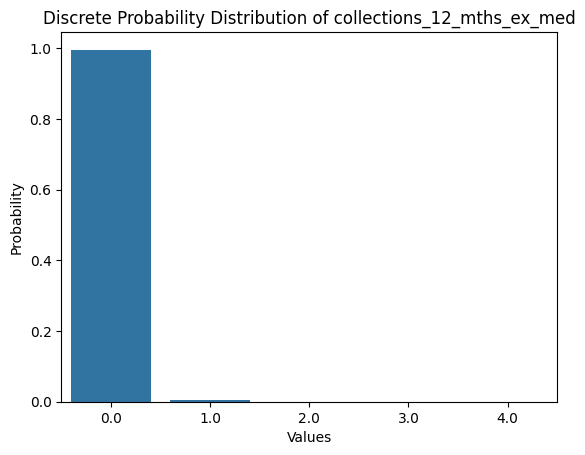

The mode of the distribution is 0.0
The mean of the distribution is 0.004208194905869324
The median of the distribution is 0.0


In [27]:



for column_name in df:
    if df[column_name].dtype != 'category':
        null_count = df[column_name].isna().sum()
        if null_count>0:
            # Calculate value counts and convert to probabilities
            probs = df[column_name].value_counts(normalize=True)

            # Create bar plot
            dpd=sns.barplot(y=probs.values, x=probs.index) 

            plt.xlabel('Values')
            plt.ylabel('Probability')
            plt.title('Discrete Probability Distribution of '+column_name)
            plt.show()
            print(f"The mode of the distribution is {df[column_name].mode()[0]}")
            print(f"The mean of the distribution is {df[column_name].mean()}")
            print(f"The median of the distribution is {df[column_name].median()}")

funded_amount should have the median used to impute NULL values because the mode is not  overhwlemignly most-freuent, and the mean is clsoe to the median, yet affected by higehr values.

int_rate should have the median used to impute NULL values because the mode is not an overhwlemignly most-freuent, and the mean is clsoe to the median, yet affected by higehr values.

last_payment_Date and last_credit_pull_date and collections_12_mths_ex_med should have the mode used to impute NULL values because the mode is  overhwlemignly most-fireuqent by a large margin.

In [28]:
df = dataframe_transforming_instance.impute(df,'funded_amount','median')
df = dataframe_transforming_instance.impute(df,'int_rate','median')
df = dataframe_transforming_instance.impute(df,'last_payment_date','mode')
df = dataframe_transforming_instance.impute(df,'last_credit_pull_date','mode')
df = dataframe_transforming_instance.impute(df,'collections_12_mths_ex_med','mode')

then check what has changed:

In [29]:
print(DataFrameInfo_instance.calculate_percentages_of_null_values(df))

id has 0 null values out of 54231 values, which is 0.0 percent of the column.
member_id has 0 null values out of 54231 values, which is 0.0 percent of the column.
loan_amount has 0 null values out of 54231 values, which is 0.0 percent of the column.
funded_amount has 0 null values out of 54231 values, which is 0.0 percent of the column.
funded_amount_inv has 0 null values out of 54231 values, which is 0.0 percent of the column.
term has 0 null values out of 54231 values, which is 0.0 percent of the column.
int_rate has 0 null values out of 54231 values, which is 0.0 percent of the column.
instalment has 0 null values out of 54231 values, which is 0.0 percent of the column.
grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
sub_grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
employment_length has 0 null values out of 54231 values, which is 0.0 percent of the column.
home_ownership has 0 null values out of 54231 values, which

In [30]:
null_counts = DataFrameInfo_instance.count_amounts_of_null_values(df)
null_counts[null_counts > 0].sort_values(ascending=False)

last_payment_date             73
collections_12_mths_ex_med    51
last_credit_pull_date          7
dtype: int64

We still have some null values that were not successfully imputed. Let's investigate:

In [31]:
import numpy as np
np.where(pd.isnull(df))

(array([ 1963,  2367,  2489,  3486,  3530,  3638,  5840,  8097, 10752,
        13807, 14394, 15495, 15954, 16273, 16402, 17573, 17582, 18349,
        19546, 21600, 21982, 26560, 27342, 27503, 27683, 28187, 28223,
        28561, 29372, 32309, 32900, 33422, 34686, 35285, 35665, 37659,
        38326, 38758, 38988, 39024, 39110, 39274, 40090, 40223, 40557,
        40674, 40773, 41364, 41379, 42215, 42292, 42469, 44663, 45453,
        46179, 46233, 47069, 47335, 47566, 48933, 49016, 49529, 49535,
        49611, 49634, 49853, 49958, 50188, 50370, 50542, 50561, 51084,
        51202, 51651, 51659, 51798, 52663, 53540, 53593, 53926, 54146,
        54164, 54171, 54174, 54176, 54177, 54179, 54180, 54181, 54182,
        54183, 54184, 54185, 54186, 54187, 54189, 54191, 54192, 54193,
        54194, 54195, 54196, 54197, 54198, 54200, 54201, 54202, 54205,
        54206, 54207, 54208, 54209, 54210, 54211, 54212, 54213, 54214,
        54215, 54216, 54217, 54218, 54219, 54220, 54222, 54223, 54224,
      

In [32]:
df.iloc[1963,33]

NaT

In [33]:
[df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))]

[NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 NaT,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

Most remianign columns wiht null values in contain date: their null values are labelled Nat for 'Not a Time'.
One column (collections_12_mths_ex_med) contains the string 'nan' instead of NaN.
We can replace those with the modes of their columns:

In [34]:
# print(df['last_payment_date'].mode())

# # df['last_payment_date'].mode()

# # this repalces with mode, but make the column's datatype a string
# df['last_payment_date'] = df['last_payment_date'].replace({np.nan: str(df['last_payment_date'].mode())})

# df['last_credit_pull_date'] = df['last_credit_pull_date'].replace('NaT',str(df['last_credit_pull_date'].mode()))


for column_name in ('last_payment_date', 'last_credit_pull_date','collections_12_mths_ex_med'):
            # this repalces with mode, but make the column's datatype a string
            # print(df[column_name].mode().iat[0])
            # print(df[column_name].mode().iat[0].dtype)
            print('***')
            df[column_name] = df[column_name].replace({np.nan: df[column_name].mode().iat[0]})
            print(column_name,'now has datatype',df[column_name].dtype)
            # makes the columns back into a datetime datatype
            df = df_transforming_instance.date_convert(df, column_name)
            # df[column_name] = pd.to_datetime(df[column_name], format='mixed', errors = 'coerce')
            print(column_name,'now has datatype',df[column_name].dtype)



df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].replace('nan',str(df['collections_12_mths_ex_med'].mode()))
# covnert to int again
df = df_transforming_instance.convert_to_int(df, 'collections_12_mths_ex_med')

***
last_payment_date now has datatype datetime64[ns]
last_payment_date now has datatype datetime64[ns]
***
last_credit_pull_date now has datatype datetime64[ns]
last_credit_pull_date now has datatype datetime64[ns]
***
collections_12_mths_ex_med now has datatype float64
collections_12_mths_ex_med now has datatype datetime64[ns]


then check what has changed:

In [35]:
print(DataFrameInfo_instance.calculate_percentages_of_null_values(df))

id has 0 null values out of 54231 values, which is 0.0 percent of the column.
member_id has 0 null values out of 54231 values, which is 0.0 percent of the column.
loan_amount has 0 null values out of 54231 values, which is 0.0 percent of the column.
funded_amount has 0 null values out of 54231 values, which is 0.0 percent of the column.
funded_amount_inv has 0 null values out of 54231 values, which is 0.0 percent of the column.
term has 0 null values out of 54231 values, which is 0.0 percent of the column.
int_rate has 0 null values out of 54231 values, which is 0.0 percent of the column.
instalment has 0 null values out of 54231 values, which is 0.0 percent of the column.
grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
sub_grade has 0 null values out of 54231 values, which is 0.0 percent of the column.
employment_length has 0 null values out of 54231 values, which is 0.0 percent of the column.
home_ownership has 0 null values out of 54231 values, which

In [36]:
null_counts = DataFrameInfo_instance.count_amounts_of_null_values(df)
null_counts[null_counts > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [37]:
df.dtypes

id                                     int64
member_id                              int64
loan_amount                            int64
funded_amount                        float64
funded_amount_inv                    float64
term                                category
int_rate                             float64
instalment                           float64
grade                               category
sub_grade                           category
employment_length                   category
home_ownership                      category
annual_inc                             int64
verification_status                 category
issue_date                    datetime64[ns]
loan_status                         category
payment_plan                         boolean
purpose                             category
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line                  object
inq_last_6mths                         int64
open_accou

Let's visulaise the removal of the null values:

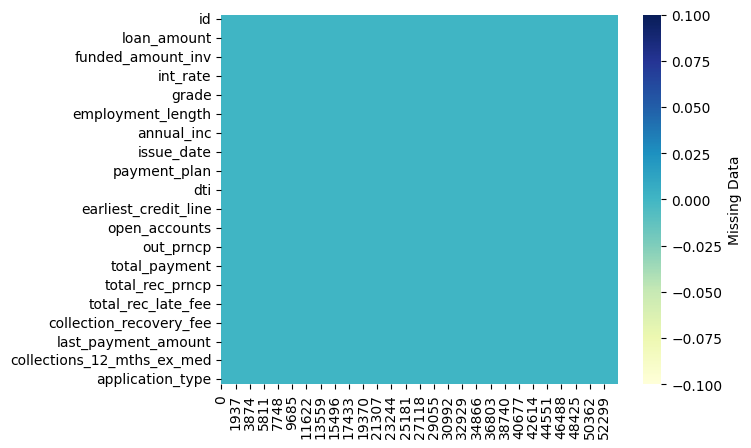

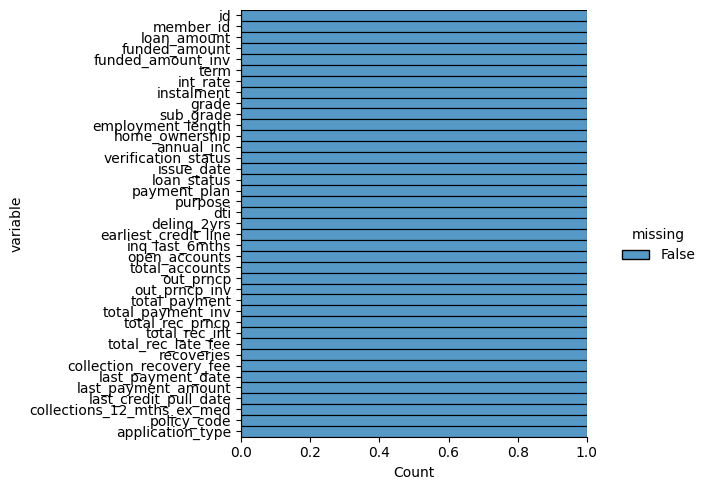

In [38]:
from Plotter import Plotter
plotter_instance = Plotter()
plotter_instance.visualise_null_values(df)


Skewness

Skewed data can lead to biased models and inaccurate results, so it's important to address this issue before proceeding with any analysis.

We identify the skewed columns in the data using standard Pandas methods. 

In [39]:
df.skew(axis=0,skipna=True,numeric_only=True)

id                              2.370336
member_id                       2.205422
loan_amount                     0.805259
funded_amount                   0.869922
funded_amount_inv               0.813927
int_rate                        0.456515
instalment                      0.996981
annual_inc                      8.711831
payment_plan                  232.875503
dti                              0.18942
delinq_2yrs                     5.370002
inq_last_6mths                  3.248918
open_accounts                   1.059282
total_accounts                  0.779014
out_prncp                       2.356426
out_prncp_inv                   2.356848
total_payment                   1.267891
total_payment_inv               1.256197
total_rec_prncp                 1.261015
total_rec_int                   2.204322
total_rec_late_fee             13.184305
recoveries                     14.589793
collection_recovery_fee        27.636843
last_payment_amount             2.499381
collections_12_m

Ideally the skewness of each column should be zero, to perfectly follow a normal dsitribution. We can see that many columns have an acceptable realistic skewness between of less than 3, but there are other columns which are significantly skewed. 

We also visualise the data using the Plotter class to analyse the skew. 

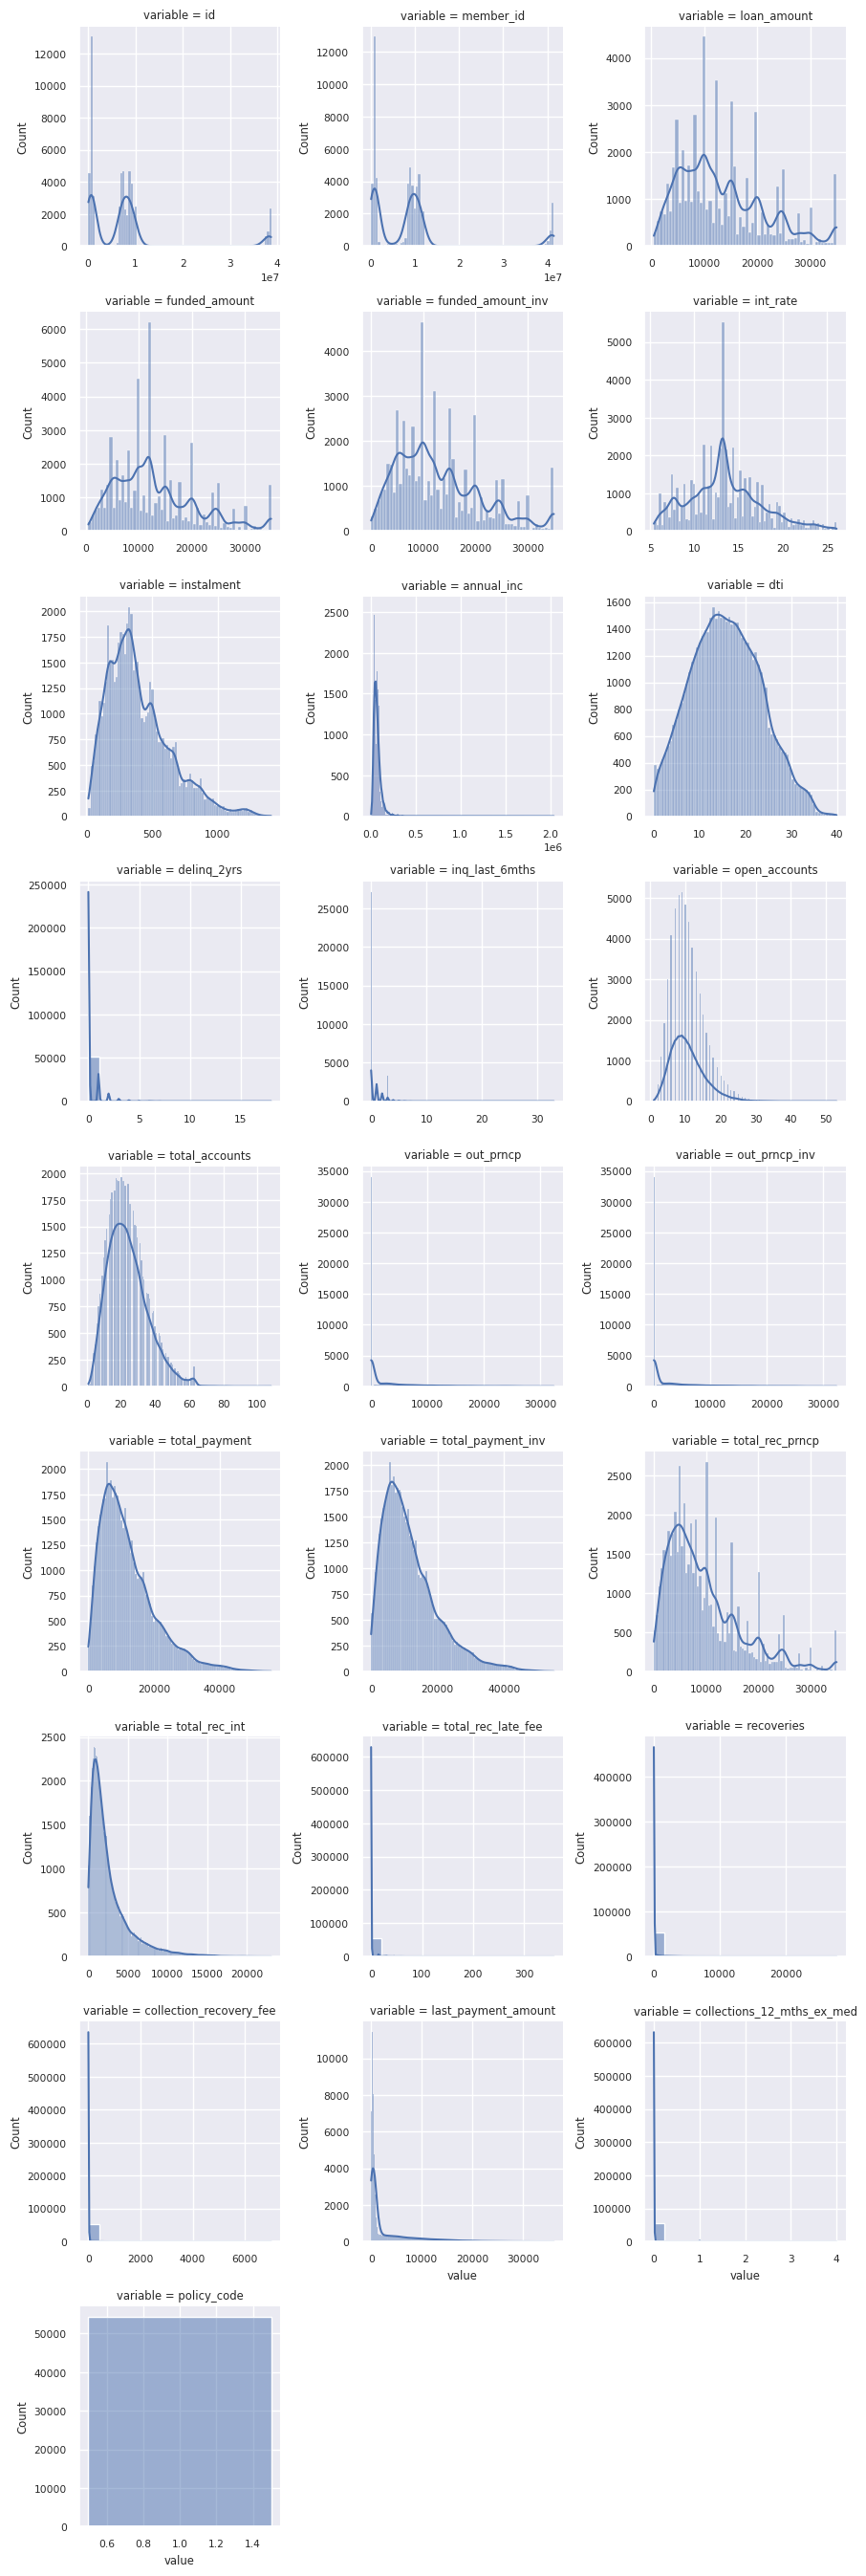

In [41]:
plotter_instance.skewness(df)

for column_name in ():
    dataframe_transforming_instance.log_transform(df,column_name)